# Cosine Similarity
CS315: Data Science for the Web  
Professor Eni Mustafaraj  
[Day 11 Slide 13](https://docs.google.com/presentation/d/1YrrYSZpmCpHepTcDQMF0s22CqyMZuw3vo801bXnRUZc/edit#slide=id.g63da1a4385_0_0)  
Edith Po  

In [44]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import string
import seaborn as sns 
import matplotlib.pyplot as plt

## Cosine Similarity Algorithm

Step 1: Create the vocabulary of all unique terms

In [7]:
lst = ['a','b','c']
lst.remove('a')

In [8]:
def create_vocab(text):
    '''Create the vocabulary of all unique terms'''
    clean_text = ""
    for char in text:
        if char not in string.punctuation:
            clean_text += char.lower()
    
    voc = set(clean_text.split())
    return voc

Step 2: Represent each document and the query in the vector space created by these terms

In [9]:
def create_vector(text,voc):
    '''
    Given a text and a vocabulary, represent the text as a vector.
    The vector contains the count of each vocabulary word in the text.
    '''
    clean_text = ""
    for char in text:
        if char not in string.punctuation:
            clean_text += char.lower()
    words = clean_text.split()
    vec = [words.count(v) for v in voc]
    return vec

Step 3: Calculate the cosine similarity between the query and each document

In [10]:
def cosine_similarity(vec1, vec2):
    '''Calculate the cosine similarity between two vectors.'''
    v1 = np.array(vec1)
    v2 = np.array(vec2)
    
    cosine = np.dot(v1,v2)/(norm(v1)*norm(v2))
    return cosine

Step 4: Rank the results based on the cosine similarity

In [11]:
def rank_by_similarity(query,sentences):
    # Create vocabulary
    all_words = " ".join(sentences)
    voc = create_vocab(all_words)

    # Convert query to vector
    query_vec = create_vector(query, voc)

    # Get cosine similarity between query and each sentence
    similarities = []
    for sent in sentences:
        sent_vec = create_vector(sent,voc)
        similarity = cosine_similarity(query_vec,sent_vec)
        similarities.append((similarity, sent))
        
    # Sort the similarities
    return sorted(similarities,reverse=True)

## Applying the Cosine Similarity Algorithm

In [14]:
q = "red dress"

sentences = [
"she wore a dress and red earrings",
"the dress has a red wine stain",
"tomorrow I will wear my new red dress",
"the red dress in the photo resembles the red dress she is wearing",
"short dress",
"red lipstick"
]

rank_by_similarity(q,sentences)

[(0.5897678246195885,
  'the red dress in the photo resembles the red dress she is wearing'),
 (0.5345224838248487, 'the dress has a red wine stain'),
 (0.5345224838248487, 'she wore a dress and red earrings'),
 (0.4999999999999999, 'tomorrow I will wear my new red dress'),
 (0.4999999999999999, 'short dress'),
 (0.4999999999999999, 'red lipstick')]

In [15]:
spring = ["As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."]

summer = ["Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."]

In [18]:
# Create vocabulary for the spring and summer sentences
spring_words = " ".join(spring) 
summer_words = " ".join(summer) 
all_words = spring_words + " " + summer_words
spr_sum_voc = create_vocab(all_words)
print(len(spr_sum_voc))

102


In [24]:
# Create vectors of each sentence
spr_sum_vecs = [create_vector(sent,spr_sum_voc) for sent in spring + summer]
print(len(spr_sum_vecs))
print(len(spr_sum_vecs[0]))

10
102


In [40]:
print(spring[0])
print(spr_sum_vecs[0])
print(spr_sum_voc)
tups = list(zip(spr_sum_vecs[0],spr_sum_voc))
clean_sent = spring[0].lower().replace(',','').replace('.','')
for tup in tups:
    if tup[1] in clean_sent.split():
        print(tup)

As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.
[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0]
{'flowers', 'life', 'but', 'unfolds', 'also', 'arrival', 'visits', 'hours', 'blossoms', 'starts', 'gardens', 'inviting', 'seasonal', 'growth', 'from', 'for', 'since', 'families', 'promise', 'of', 'a', 'arrives', 'daylight', 'enjoying', 'vacations', 'begin', 'their', 'leisure', 'sunny', 'not', 'marks', 'beach', 'brings', 'spring', 'in', 'invites', 'days', 'weather', 'extended', 'that', 'filled', 'activities', 'fun', 'spending', 'more', 'longer', 'warm', 'trend', 'even', 'pleasant', 'often', 'continuation', 'planning', 'swimming', 'sunlight', 'enjoy', 'start', 'allowing', 'blo

In [42]:
# Find the cosine similarity between each pair of sentences
similarities = []
for vec1 in spr_sum_vecs:
    row = []
    for vec2 in spr_sum_vecs:
        sim = cosine_similarity(vec1,vec2)
        row.append(sim)
    similarities.append(row)

print(len(similarities))
print(len(similarities[0]))

10
10


In [56]:
# Create a heatmap
def create_heatmap(similarities, labels):
    heatmap = sns.heatmap(data=similarities,
                          xticklabels = labels,
                          yticklabels = labels,
                          cmap="crest",
                          )
    heatmap.set_title('Cosine Similarities')
    return heatmap


<Axes: title={'center': 'Cosine Similarities'}>

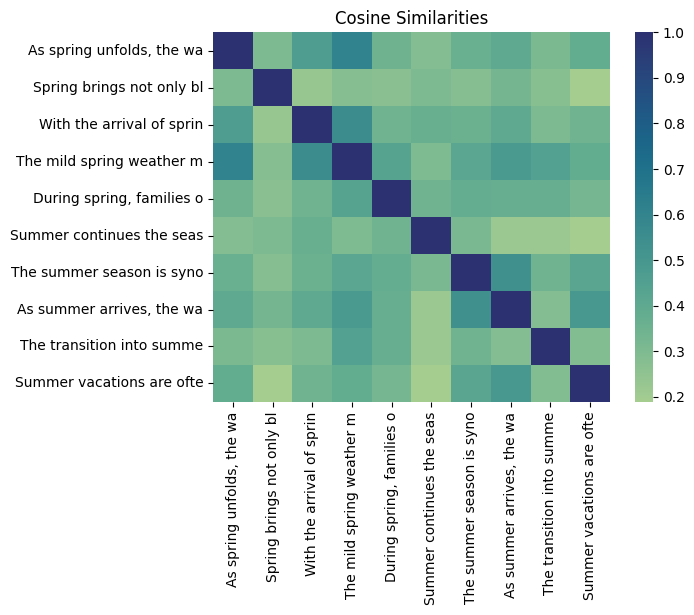

In [57]:
all_sentences = spring + summer
labels = [sent[:25] for sent in all_sentences]
create_heatmap(similarities,labels)

# Solutions from "Week 6 Task Solutions.ipynb"

## Use Jaccard similarity for a query phrase and a list of sentences

In [8]:
q = "red dress"

sentences = [
"she wore a dress and red earrings",
"the dress has a red wine stain",
"tomorrow I will wear my new red dress",
"the red dress in the photo resembles the red dress she is wearing",
"short dress",
"red lipstick"
]

def jaccard(text1, text2):
    """Implement Jaccard similarity. Assumes there is no punctuation in text."""
    sw1 = set(text1.lower().split()) # turn into a set of words
    sw2 = set(text2.lower().split())
    sim = len(sw1.intersection(sw2)) / len(sw1.union(sw2))
    return round(sim, 4) # round to 4 digits after the comma

def applyJaccard(query, sentences):
    """Appl the Jaccard similarity between query and each sentence"""
    results = []
    for sent in sentences:
        jac = jaccard(query, sent)
        results.append((jac, sent))
    
        # Sort in descending order
        results.sort(reverse=True)

    return results

# call the function

applyJaccard(q, sentences)

[(0.3333, 'short dress'),
 (0.3333, 'red lipstick'),
 (0.2857, 'the dress has a red wine stain'),
 (0.2857, 'she wore a dress and red earrings'),
 (0.25, 'tomorrow I will wear my new red dress'),
 (0.2222, 'the red dress in the photo resembles the red dress she is wearing')]

## Cosine Similarity

### Create Vocabulary

In [9]:
phrase = "that, that is the thing I want: dancing by the river! ah, the river, I have missed it so much!"

In [10]:
import string
string.punctuation # library that lists all punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
"".join(char for char in phrase if char not in string.punctuation)

'that that is the thing I want dancing by the river ah the river I have missed it so much'

In [12]:
def getVocabulary(textchunk):
    """Given some text, create the vocabulary of unique words."""
    textchunk = textchunk.lower()
    cleantext = "".join(char for char in textchunk if char not in string.punctuation)
    words = set(cleantext.split())
    voc = sorted(words)
    return voc

In [13]:
getVocabulary(" ".join(sentences))

['a',
 'and',
 'dress',
 'earrings',
 'has',
 'i',
 'in',
 'is',
 'lipstick',
 'my',
 'new',
 'photo',
 'red',
 'resembles',
 'she',
 'short',
 'stain',
 'the',
 'tomorrow',
 'wear',
 'wearing',
 'will',
 'wine',
 'wore']

### Vector representation

In [14]:
def text2vector(sentence, voc):
    """Given a sentence and the vocabulary for the problem,
    turn every sentence into a vector.
    """
    cleantext = "".join(char for char in sentence if char not in string.punctuation)
    words = cleantext.lower().split()
    vector = [words.count(w) for w in voc]
    return vector


In [15]:
voc = getVocabulary(" ".join(sentences))
text2vector(sentences[0],voc)

[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [16]:
sentences[0]

'she wore a dress and red earrings'

In [17]:
list(zip(voc, text2vector(sentences[0], voc)))

[('a', 1),
 ('and', 1),
 ('dress', 1),
 ('earrings', 1),
 ('has', 0),
 ('i', 0),
 ('in', 0),
 ('is', 0),
 ('lipstick', 0),
 ('my', 0),
 ('new', 0),
 ('photo', 0),
 ('red', 1),
 ('resembles', 0),
 ('she', 1),
 ('short', 0),
 ('stain', 0),
 ('the', 0),
 ('tomorrow', 0),
 ('wear', 0),
 ('wearing', 0),
 ('will', 0),
 ('wine', 0),
 ('wore', 1)]

In [18]:
sent2vec = [text2vector(sent, voc) for sent in sentences]
sent2vec

[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [19]:
import pandas as pd
df = pd.DataFrame(sent2vec, 
                  columns=voc,
                  index=[f"doc_{i+1}" for i in range(len(sentences))])
df

,a,and,dress,earrings,has,i,in,is,lipstick,my,...,she,short,stain,the,tomorrow,wear,wearing,will,wine,wore
doc_1,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
doc_2,1,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
doc_3,0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
doc_4,0,0,2,0,0,0,1,1,0,0,...,1,0,0,3,0,0,1,0,0,0
doc_5,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Cosine Similarity Implementation

In [20]:
import numpy as np
from numpy.linalg import norm

def cosineSimilarity(vec1,vec2):
    """Calculate the cosine similarity between two vectors."""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1,V2)/(norm(V1)*norm(V2))
    return cosine

In [21]:
def rankDocuments(query,sentences):
    """Given a query and some sentences, rank the sentences for
    which are the most similar to the query"""
    # Step 1: create vocabulary
    voc = getVocabulary(" ".join(sentences))

    # Step 2: generate vector for query
    queryVec = text2vector(query,voc)

    # Step 3: generate vector for sentences and calculate cosine similarity at once
    similarities = []
    for sent in sentences:
        sentVec = text2vector(sent,voc)
        sim = cosineSimilarity(queryVec,sentVec)
        similarities.append((round(sim,4),sent)) # keep track of sentences

    similarities.sort(reverse=True)
    return similarities

In [22]:
rankDocuments("red dress", sentences)

[(0.5898, 'the red dress in the photo resembles the red dress she is wearing'),
 (0.5345, 'the dress has a red wine stain'),
 (0.5345, 'she wore a dress and red earrings'),
 (0.5, 'tomorrow I will wear my new red dress'),
 (0.5, 'short dress'),
 (0.5, 'red lipstick')]

## Similarity of Spring and Summer sentences

In [23]:
springSentences = [
"As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun."
]

summerSentences = [
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."
]

### Create Vocabulary for Spring and Summer Sentences

In [24]:
allSentences = " ".join(springSentences) + " " + " ".join(summerSentences)
voc = getVocabulary(allSentences)
print(f"Vocabulary has {len(voc)} words.")

Vocabulary has 102 words.


### Convert sentences to vectors

In [25]:
sentVectors = [text2vector(sent,voc) for sent in springSentences + summerSentences]
print(len(sentVectors),len(sentVectors[0]))

10 102


In [26]:
oneSent = springSentences[0]
oneSent

'As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.'

In [27]:
pairs = list(zip(text2vector(oneSent,voc),voc))
nonZero = [pair for pair in pairs if pair[0] != 0]
nonZero

[(1, 'ahead'),
 (1, 'as'),
 (1, 'blossoms'),
 (1, 'days'),
 (1, 'encourages'),
 (1, 'first'),
 (1, 'longer'),
 (1, 'of'),
 (1, 'open'),
 (1, 'season'),
 (1, 'signaling'),
 (1, 'spring'),
 (3, 'the'),
 (1, 'to'),
 (1, 'unfolds'),
 (1, 'warmth')]

In [28]:
print(f"Words in sentence: {len(oneSent.split())}; nonzero terms in vector: {len(nonZero)}")

Words in sentence: 18; nonzero terms in vector: 16


### Calculating the similarity matrix

Calculate the cosine similarity for every pair of sentences. This makes sense 
since we only have 10 sentences. If we had way more, we will try to be more 
efficient and not repeat the calculations, since we know the matrix is symmetrical.

In [29]:
simMatrix = []
for vec1 in sentVectors:
    simRow = []
    for vec2 in sentVectors:
        simRow.append(cosineSimilarity(vec1,vec2))
    simMatrix.append(simRow)

print(simMatrix)

[[1.0000000000000002, 0.3061862178478973, 0.468292905790847, 0.6064784348631228, 0.3481553119113957, 0.2857738033247041, 0.3651483716701107, 0.40089186286863665, 0.3118047822311618, 0.38575837490522974], [0.3061862178478973, 1.0, 0.22941573387056174, 0.2785430072655778, 0.26650089544451305, 0.3, 0.2795084971874737, 0.3273268353539886, 0.2727723627949905, 0.1889822365046136], [0.468292905790847, 0.22941573387056174, 0.9999999999999998, 0.5538186196949965, 0.3423811916311629, 0.3670651741928988, 0.3590924232298039, 0.40050093945740706, 0.3003757045930553, 0.3468439878096479], [0.6064784348631228, 0.2785430072655778, 0.5538186196949965, 1.0000000000000002, 0.43549417035569277, 0.297112541083283, 0.41522739926869984, 0.4862645390838647, 0.44574249416020933, 0.386024323488978], [0.3481553119113957, 0.26650089544451305, 0.3423811916311629, 0.43549417035569277, 1.0, 0.34112114616897665, 0.38138503569823684, 0.37219368415938836, 0.37219368415938836, 0.3223291856101521], [0.2857738033247041, 0.

### Generate the heatmap

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def drawHeatmap(sentLabels,simMtrx,plotTitle):
    """Draws a heatmap for the similarity matrix"""
    sns.set(font_scale=0.9)
    g = sns.heatmap(
        simMtrx, # similarity matrix with the cosine sim values
        xticklabels = sentLabels,
        yticklabels = sentLabels,
        vmin = 0,
        vmax = 1,
        cmap = "YlOrRd")
    g.set_xticklabels(sentLabels, rotation=90)
    g.set_title(plotTitle, fontsize=14)
    plt.show()

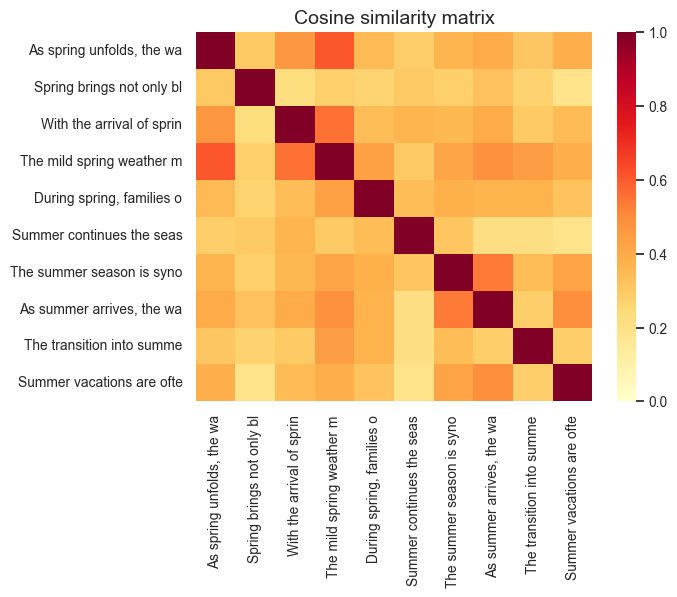

In [31]:
shortSent = [sent[:25] for sent in springSentences+summerSentences]
drawHeatmap(shortSent, simMatrix, "Cosine similarity matrix")

In [32]:
labels = [f"s{i+1}" for i in range(10)]
df = pd.DataFrame(simMatrix, columns=labels, index=labels)
df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10
s1,1.000000,0.306186,0.468293,0.606478,0.348155,0.285774,0.365148,0.400892,0.311805,0.385758
s2,0.306186,1.000000,0.229416,0.278543,0.266501,0.300000,0.279508,0.327327,0.272772,0.188982
s3,0.468293,0.229416,1.000000,0.553819,0.342381,0.367065,0.359092,0.400501,0.300376,0.346844
s4,0.606478,0.278543,0.553819,1.000000,0.435494,0.297113,0.415227,0.486265,0.445742,0.386024
s5,0.348155,0.266501,0.342381,0.435494,1.000000,0.341121,0.381385,0.372194,0.372194,0.322329
s6,0.285774,0.300000,0.367065,0.297113,0.341121,1.000000,0.313050,0.218218,0.218218,0.188982
s7,0.365148,0.279508,0.359092,0.415227,0.381385,0.313050,1.000000,0.536745,0.341565,0.422577
s8,0.400892,0.327327,0.400501,0.486265,0.372194,0.218218,0.536745,1.000000,0.285714,0.494872
s9,0.311805,0.272772,0.300376,0.445742,0.372194,0.218218,0.341565,0.285714,1.000000,0.288675
s10,0.385758,0.188982,0.346844,0.386024,0.322329,0.188982,0.422577,0.494872,0.288675,1.000000


In [33]:
def getWords(sent):
    """Get the words of a sentence after lowercasing and removing punctuation."""
    cleantext = "".join(char for char in sent.lower() if char not in string.punctuation)
    cleanWords = cleantext.split()
    return cleanWords

In [34]:
def compareSentences(sent1, sent2):
    """Compare the content of two sentences."""
    words1 = getWords(sent1)
    words2 = getWords(sent2)
    commonWords = sorted([w for w in words1 if w in words2])
    print("COMPARISON RESULTS")
    print("Sent1: ", sent1)
    print("Sent2: ", sent2)
    print(f"Lengths of sentences: {len(words1)} and {len(words2)}. Words in common: {len(commonWords)}")
    print("Common words:", commonWords)

In [35]:
compareSentences(springSentences[0], springSentences[3])

COMPARISON RESULTS
Sent1:  As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.
Sent2:  The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.
Lengths of sentences: 18 and 17. Words in common: 7
Common words: ['of', 'spring', 'the', 'the', 'the', 'to', 'warmth']


In [36]:
compareSentences(summerSentences[1], summerSentences[2])

COMPARISON RESULTS
Sent1:  The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.
Sent2:  As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.
Lengths of sentences: 18 and 19. Words in common: 9
Common words: ['began', 'enjoying', 'in', 'outdoor', 'spring', 'summer', 'that', 'the', 'the']
